# Script that plots and extract statistics for the diagnoses tags

### Import libs

In [1]:
import pandas as pd
import json
import os
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt

### Utils functions

In [2]:
def build_dictionary_from_list(input_list:list)->dict:
    '''
    Function that build dict from list based on the uniqe elements in the list
    and their number of occurances. key: list element, value: number of occurances in list
    
    Args:
        * input_list, list, list for which we want to build dictionary
    
    Output:
        * dict, dict, dictionary representing key-->values for the input list 
    '''
    # Storage dict
    _output_dict = {}
    
    # Get counts
    for _key, _value in zip(Counter(input_list).keys(), Counter(input_list).values()):
        _output_dict[_key] = _value
        
    # Return
    return _output_dict

def plot_dictionary(input_dict:dict, save:bool = False):
    '''
    Function that plots dictionary: x-tics names, y-tics values
    
    Args:
        * input_dict, dict, dict to be ploted
        * save, bool, saving fig as "fig.png"
    '''
    _names = list(input_dict.keys())
    _values = list(input_dict.values())
    
    plt.title(f"Total number of different diagnoses: {len(input_dict)}")
    plt.bar(range(len(input_dict)), _values, tick_label=_names)
    plt.xticks(rotation = 90)
    if save:
        plt.savefig("fig.png")
    else:
        plt.show()

remove_spaces = lambda x: "".join(x.split()) 
'''
Lambda function for space removal

Args:
    * x, string, string for which we want to remove space
Output:
    * x, string, string with space removed
'''

def obtain_data(ann_json_dir:str)->list:
    '''
    Function that returns lists containing different fracture names, sides and projections 
    for given directory
    
    Args:
        * ann_json_dir,string, path to directory containing annotations
        
    Output:
        * three list where first one contains diagnoses, second one sides, and third one
        projections.
    '''
    # Read files
    _ann_files = os.listdir(ann_json_dir)

    # Find all different diagnoses  and their amoun
    _diagnoses_list = []
    _side_list = []
    _projection_list = []
    _missing_fract_type = 0

    for _file in _ann_files:
        # Grab data from file
        _f = open(_ann_json_dir+"/"+_file)
        _data = json.load(_f)

        # Grab tags and objects
        _tags = _data['tags']
        _objects = _data['objects']

        # Find classification

        # Check if tag type is dictionary --> consis diagnosis
        _tag = _tags[0]
        if type(_tag) is not dict:
            # Not dictionary == no fracture
            _missing_fract_type += 1
        else:       
            if len(_tag['value'].split(",")) > 1:
                _diagnoses_list += _tag['value'].split(",")
            else:
                _diagnoses_list += _tag['value'].split(";")

        # Get side
        _tag = _tags[-1]
        _tag = _tag.split("_")[-1]
        _side_list.append(_tag)

        # Get projection
        _tag = _tags[-2]
        _tag = _tag.split("_")[-1]
        if _tag in ["oblique", "ap", "lat"]:
            _projection_list.append(_tag)

    # Remove spaces
    _diagnoses_list = list(map(remove_spaces, _diagnoses_list))

    return _diagnoses_list, _side_list, _projection_list


# Noise in fractures - smoething that we can not utilize
global_noise_fractures = ['8620bbff3ebaae183964c', '2f99822f0c6ae7ebf', '69a677a94dadce5d3c416b39210b82', 
         "23u-E/7<", '72B(c)', '72B(b)', '72B.(b)', '77.1.1A', '77.2.1A', '77.3.1C', 
         '77.4.1A', '77.5.1A', '76.2.A',  '23-M2.1', '23-M3.1', '23r-M3.1','23r-/M/2.1', '23u-M2.1',
         '23u-E7', '23u/E/7', '23r-M2.1']

### Root to directories

In [3]:
# Annotation directory
_ann_json_dir = "/home/franko/Desktop/Frlan/Novo/Data/supervisely/wrist/ann"
# Image directiory 
_img_dir = "/home/franko/Desktop/Frlan/Novo/Data/supervisely/wrist/img"

### Read data and extract information

In [4]:
# COUNT EVERYTHING!!!! :)
# Function that extract data
_diagnoses_list, _, _ = obtain_data(_ann_json_dir)

# Obtain dictionary
_diagnoses_dict = build_dictionary_from_list(_diagnoses_list)
_diagnoses_dict = OrderedDict(sorted(_diagnoses_dict.items(), key=lambda x: x[1], reverse=True))
print(_diagnoses_dict)

OrderedDict([('23r-M/3.1', 5172), ('23r-M/2.1', 3627), ('23u-E/7', 3212), ('23u-M/2.1', 2330), ('23-M/3.1', 1667), ('23r-E/2.1', 1433), ('23-M/2.1', 1410), ('22r-D/2.1', 162), ('23r-E/1', 106), ('22-D/2.1', 88), ('22r-D/4.1', 81), ('23u-M/3.1', 78), ('23u-E/2.1', 78), ('23u-E/1', 66), ('22u-D/2.1', 62), ('72B(b)', 52), ('72B(c)', 38), ('22-D/4.1', 31), ('23-E/2.1', 30), ('22u-D/1.1', 26), ('22u-D/4.1', 24), ('23r-E/7', 24), ('23u-E/3', 22), ('23r-E/3', 18), ('22r-D/5.1', 14), ('23u-E/1.1', 10), ('22r-D/1.1', 10), ('72B.(b)', 10), ('22-D/1.1', 10), ('23r-E/4.1', 9), ('23u-E7', 8), ('23r-E/4.2', 8), ('23r-E/2.2', 6), ('22r-D/1', 6), ('23u-E/4', 5), ('23u-M/2.', 5), ('23r-D/2.1', 4), ('22r-D/3.1', 4), ('77.5.1A', 4), ('23r-M3.1', 4), ('23r-M2.1', 4), ('23u/E/7', 4), ('23u-M2.1', 3), ('77.1.1A', 3), ('23r-E/3.1', 2), ('23r-/M/2.1', 2), ('23-E/7', 2), ('77.2.1A', 2), ('77.3.1C', 2), ('77.4.1A', 2), ('22r-M/2.1', 2), ('22-D/5.1', 2), ('23r-D/3.1', 2), ('23-M2.1', 2), ('23-E/1', 2), ('23u-D/2

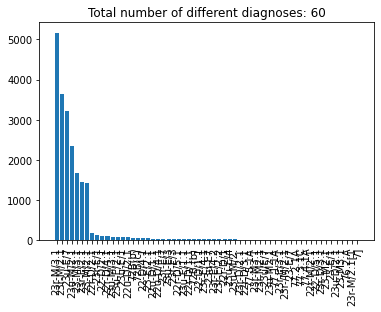

In [5]:
plot_dictionary(_diagnoses_dict, save = True)
_diagnoses_df = pd.DataFrame(_diagnoses_dict.items(), columns=['Diagnosis', 'Frequency'])
_diagnoses_df.to_excel("Data.xlsx")